# 相关和回归

## 正态假设下的Pearson相关系数的检验

给定二维样本，我们可以计算其Pearson相关系数反映这两维的相关系数。
我们也可以对多维样本计算样本协方差矩阵或相关矩阵来反映各维度（变量）之间的相关关系。

从推断统计的角度看，确定样本总体分布和样本规模后，（Pearson）相关系数就是一随机变量，典型的例子就是Winshart随机矩阵。
这里样本离差阵作为计算样本协方差的中间一步，在以（0期望）多元正态分布为总体分布后，就将其所服从的分布称为自由度为其样本规模的Winshart分布。

在两变量下若设其服从0相关系数的二元正态分布，可以得到下面统计量与所服从分布的关系。（反正我没从直观上看出它怎么来的。。）

$$
r\sqrt{\frac{n-2}{1-r^2}} \sim t(n-2)
$$

其中$r$是样本相关系数。

$$
r = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{ \sum_{i=1}^n (X_i - \bar{X})^2 \sum_{i=1}^n (Y_i - \bar{Y})^2 }}
$$

必须考虑考虑原假设和备择假设的区分问题，一是该统计量在备择假设上——相关系数取不等于0的数的时候到底服从什么分布。
另一个是是否在相关系数不为0的时候，可以以类似的方式构造一个同样服从$t(n-2)$的统计量。

我们经常不知道那种严重依赖于简单原假设确定分布的统计量在参数取其他值时的分布，不过我们可以做模拟或直观的讨论，
即所谓“在备择假设上有变大的趋势”，“在备择假设上位置变大”，后者似乎暗示除了位置其他都没有改变，这一般都不成立。
例子如在方差分析中若违背了同期望假设，我们直观上觉得这在之前“对等”地位的所有情况上因为差异变大而把平方和变大了，所以说它有变大的趋势。

回到Pearson相关系数那个统计量上来，显然偏向备择假设上时$r$有偏离0的趋势，则该统计量也会偏向无限大或无限小，
于是依零假设围绕0划分的接受域具有有效的功效。



In [3]:
DM1 <- data.frame(
    X = c(13, 17, 100, 31, 360, 880, 61, 5, 110, 32, 54, 78, 110, 1600, 230, 300, 55, 510, 5, 550, 130, 480, 260, 170, 15, 14, 56, 230, 760, 10),
    Y = c(12, 5,  112, 17, 106, 146, 13, 4, 68,  45, 8,  21, 39,  262,  38,  93,  21, 108, 6, 84,  22,  73,  35,  29,  3,  8,  37, 41,  235, 4)
)
head(DM1)

X,Y
13,12
17,5
100,112
31,17
360,106
880,146


In [8]:
cor(DM1$X,DM1$Y)

[1] 0.9004762

In [7]:
cor(DM1$X,DM1$Y, method = 'pearson')

[1] 0.9004762

In [10]:
cor.test(DM1$X,DM1$Y,method='pearson')


	Pearson's product-moment correlation

data:  DM1$X and DM1$Y
t = 10.956, df = 28, p-value = 1.235e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7996123 0.9519271
sample estimates:
      cor 
0.9004762 


In [12]:
r <- cov(DM1$X,DM1$Y)/sqrt(var(DM1$X)*var(DM1$Y))
r

[1] 0.9004762

In [14]:
n <- nrow(DM1)
t.stat <- r*sqrt((n-2)/(1-r^2))
t.stat

[1] 10.95611

In [20]:
pt(t.stat,n-2,low=F)*2

[1] 1.235226e-11

然而仅根据零假设下的统计量的分布并不能反推出置信区间，我们需要该统计量在$\rho$取各种值时的分布，
然后把$X$在对应分布的显得过于极端而拒绝了假设的参数从置信区间中剔除出去。虽然应该有精确分布，但这里还是先借助模拟。

In [25]:
rmultinorm <- function(n,mu,Sigma){
    res <- eigen(Sigma)
    Lambda <- diag(res$values)
    P <- res$vectors
    r <- replicate(n,as.vector( P %*% Lambda^(1/2) %*% rnorm(length(mu))) + mu)
    return(r)
}

rrho <- function(n, rho, df){
    rv <- c()
    for(i in 1:n){
        XY <- rmultinorm(df,c(0,0),matrix(c(1,rho,rho,1),2))
        r <- cor(XY[1,],XY[2,],method = 'pearson')
        rv[i] <- r
    }
    return(rv)
}

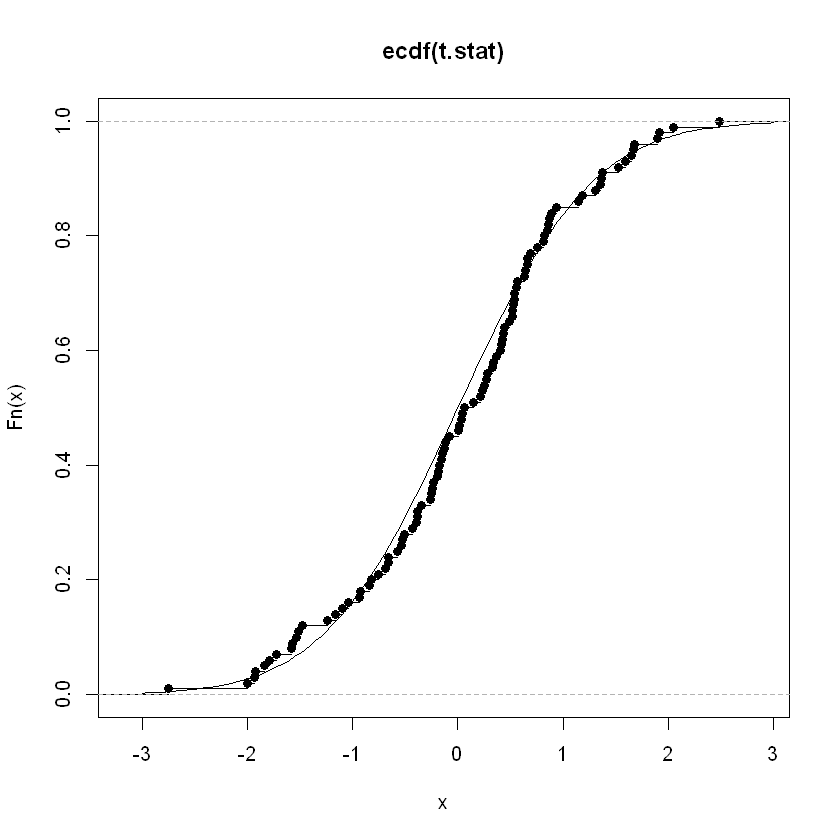

In [37]:
r <- rrho(100,0,30)
t.stat <- r*sqrt((n-2)/(1-r^2))

plot(ecdf(t.stat))
x <- seq(-3,3,0.05)
lines(x,pt(x,28))

In [42]:
t.stat.sample <- 10.9561134010731
alpha <- 0.05

pv <- c()

for(i in 1:100){
    r <- rrho(100,i/100,n)
    t.stat <- r*sqrt((n-2)/(1-r^2))
    t.ecdf <- ecdf(t.stat)
    p.value <- min(t.ecdf(t.stat.sample),1-t.ecdf(t.stat.sample))*2
    pv[i] <- p.value
}

In [43]:
pv

[1] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [16] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [31] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [46] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [61] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.04 0.00 0.00 0.02 0.00 0.00 0.00
 [76] 0.00 0.00 0.02 0.00 0.10 0.10 0.12 0.22 0.14 0.24 0.42 0.52 0.62 0.80 0.98
 [91] 0.72 0.48 0.18 0.18 0.08 0.06 0.00 0.00 0.00 0.00

In [44]:
which(pv>0.05)

[1] 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96

而`cor.test`给出的结果是`0.7996123 0.9519271`，看得出还是比较准的。

## Spearman秩相关检验

对于Pearson相关系数而言，我们可以对数据进行各种变换，一般会得到不同的相关系数。

In [45]:
cor(log(DM1$X),log(DM1$Y))

[1] 0.8979981

即使是这种单调的变换也会产生差别，如果这个性质并不是我们想要的，我们可以考虑一个对单调变换保持不变的某种相关系数。
比如，先对数据取秩，再计算Pearson相关系数。

In [46]:
cor(rank(DM1$X),rank(DM1$Y))

[1] 0.8774488

In [47]:
cor(rank(log(DM1$X)),rank(log(DM1$Y)))

[1] 0.8774488

In [48]:
cor(DM1$X,DM1$Y,method = "spearman")

[1] 0.8774488

这就是Spearman相关系数$r_s$。

$r_s$具有渐进正态分布

$$
Z = r_s \sqrt{n-1} \to N(0,1)
$$

In [56]:
rs <- cor(rank(DM1$X),rank(DM1$Y))
pnorm(rs * sqrt(n-1),low=F)*2

[1] 2.298818e-06

In [55]:
cor.test(DM1$X,DM1$Y,method='spearman')

Warning message in cor.test.default(DM1$X, DM1$Y, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  DM1$X and DM1$Y
S = 550.87, p-value = 1.965e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8774488 


这里结果对不上是因为`cor.test`用了更复杂的处理结的统计量。不过这个无伤大雅。这里没计算置信区间是因为置信区间是分布相关的，
而这里的用的是参数无关的非参数检验，给什么正态下的置信区间有误导性。

In [58]:
sum((rank(DM1$X)-rank(DM1$Y))^2)

[1] 550.5

上面的统计量$S$是统计量$\sum_i d_i^2 = \sum_{i} (R_i - S_i)^2$。该统计量偏小说明有正相关倾向，偏大说明有负相关倾向。
结果对不上是因为处理秩的方式不一样。

## Kendall $\tau$ 相关检验

Kendall $\tau$相关系数是构造$\Psi$矩阵，其中

$$
\Psi_{ij} = \mathrm{sign}((X_j - X_i)(Y_j - Y_i))
$$

然后求和右上角所有的元得到统计量$K$，再标准化成统计量$\hat{\tau}$

$$
K = \sum_{1 \le i < j \le n} \Psi_{ij} \\
\hat{\tau} = \frac{K}{ \begin{pmatrix} n \\ 2 \end{pmatrix} }
$$

$\Psi$实际是$i,j$对是否协同的表示，1表示协同，-1表示不协同。$\hat{\tau}$取值$[-1,1]$且该值越大越反映数据某种意义(Kendall协同意义)上正相关，
该值越小反映它负相关。

统计量$K$在不相关原假设成立条件下具有渐进正态分布

$$
K \sqrt{ \frac{18}{n(n+1)(2n+5)} } \to N(0,1)
$$

### 与Kendall协同系数检验的关系

首先，我们是否可以将正负相关定义到多变量上去呢？这里指的不是变量两两之间相关，而是指这个变量组作为整体的正负相关，
正如两个变量作为整体可以讨论正负相关一般。

典型相关分析那种是一种处理方式，在那里我们找到两组变量两组线性组合，使它们线性相关程度最大。
仿照这个思路可以找到原变量的某种线性组合，定义它的最小值为整体的相关系数之类的。

$$
\rho(X) = \max_\beta \min_i (\rho(X_i,\beta X))
$$

这看上去是个蹩脚的做法，就像典型相关分析本身一样蹩脚。如果它们真有什么“主成分”的话，这个方法可以取到很大的相关系数。可是负相关呢？
看起来负相关是双变量时的特殊结构，如果把这种相关系数看成相关矩阵的函数，二变量上的正负相关无非是对反对角线上的一个元做出说明。
而在多元情况下这就不可能如此简单了。

不过这种“主成分”的想法启发了我们，回忆Kendall协同系数检验，它的原假设是区组的效应被处理的无限大噪声完全混淆了。而在向备择假设移动时，
区组本应有的效应开始浮现出来。这个所谓的区组效应，正是使得各秩倾向于相同（回归某个区组决定的“真实”排序）的动力，
于是我们可以把这个趋近相同的程度定义为相关系数，这是Kendall协同系数检验里的那个协同系数。

在本节的二元情况中，这个相同性（协同性）是通过比较所有可能对得到的。多变量Kendall协同系数难以照搬这个方法，
于是它退而求各分组（这里的个体）的秩和与分组平均秩和的差的平方和。这个平方和会在各秩和散度很大时变大，
而散度最大的情况显然就是区组（个体）效应完全支配的，即每个区组（个体）的秩都一样。而这正好也是协同系数取1的情况。
它们的原假设也类似，都是协同系数为0.在二元上看也可以看成$\Psi$矩阵结构的随意性。

In [61]:
CPIESI <- data.frame(
    CPI = c(1.2, 1.6, 1.7, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3.0, 3.2, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.5,
            4.8, 4.9, 5.1, 5.2, 5.7, 6.0, 6.3, 6.4, 6.9, 7.1, 7.3, 7.5, 7.7, 7.8, 8.5, 8.6, 8.7, 9.0, 9.3, 9.5, 9.7),
    ESI = c(44.1, 45.4, 59.7, 45.3, 51.2, 34.8, 48.6, 51.5, 48.1, 51.1, 50.3, 49.3, 57.7, 49.7, 43.8, 37.9, 58.9, 46.6, 59.5, 52.8, 62.2, 59.6,
            46.2, 52.0, 71.8, 50.1, 56.7, 57.5, 55.2, 55.9, 59.2, 44.4, 56.9, 53.6, 52.9, 62.7, 73.4, 61.0, 50.2, 64.4, 71.7, 58.2, 75.1)
)
head(CPIESI)

CPI,ESI
1.2,44.1
1.6,45.4
1.7,59.7
1.9,45.3
2.1,51.2
2.2,34.8


In [65]:
cor(CPIESI,method='pearson')

,CPI,ESI
CPI,1.0000000,0.5972526
ESI,0.5972526,1.0000000


In [66]:
cor(CPIESI,method='spearman')

,CPI,ESI
CPI,1.0000000,0.5890969
ESI,0.5890969,1.0000000


In [67]:
cor(CPIESI,method='kendall')

,CPI,ESI
CPI,1.0000000,0.4219269
ESI,0.4219269,1.0000000


In [73]:
Psi <- sign(outer(CPIESI$CPI, CPIESI$CPI, '-') * outer(CPIESI$ESI, CPIESI$ESI, '-'))
K <- sum(Psi)/2
K

[1] 381

In [81]:
K / choose(nrow(CPIESI),2)

[1] 0.4219269

In [84]:
cor(CPIESI$CPI, CPIESI$ESI, method = 'kendall')

[1] 0.4219269

In [85]:
cor(CPIESI$CPI, CPIESI$ESI, method = 'spearman')

[1] 0.5890969

In [86]:
cor(CPIESI$CPI, CPIESI$ESI, method = 'pearson')

[1] 0.5972526

In [95]:
z <- K * sqrt(18/( n*(n+1)*(2*n+5) ))
z

[1] 6.574505

In [90]:
pnorm(z,low=F)

[1] 5.324989e-12

In [93]:
cor.test(CPIESI$CPI,CPIESI$ESI,method='kendall', exact=F)


	Kendall's rank correlation tau

data:  CPIESI$CPI and CPIESI$ESI
z = 3.9873, p-value = 6.682e-05
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4219269 


这里得到不一样结果是因为使用了大样本近似。而cor

In [97]:
res <- cor.test(CPIESI$CPI,CPIESI$ESI,method='kendall', exact=T)
res


	Kendall's rank correlation tau

data:  CPIESI$CPI and CPIESI$ESI
T = 642, p-value = 4.199e-05
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4219269 


In [98]:
res$p.value

[1] 4.199467e-05

## 功效问题

我们看到了三种相关系数的检验，那么它们功效如何呢？我们来假设二元正态分布看看结果如何。既然R直接提供了cor.test函数，我就笑纳了，
对一个样本直接用双边P值小于给定显著性水平判作拒绝。在一处参数取值处试验多次获取拒绝比例，为功效函数在此处的取值。

In [110]:
df.size <- 100
p.size <- 200
rho <- seq(-0.5,0.5,0.025)
alpha <- 0.05

p.list <- list(pearson = c(),
               spearman = c(),
               kendall = c())
for(r in rho){
    for(meth in c('pearson','spearman','kendall')){
        power <- 0
        for(i in 1:p.size){
            XY <- rmultinorm(df.size,c(0,0),matrix(c(1,r,r,1),2))
            power <- power + (cor.test(XY[1,],XY[2,],method = meth)$p.value < alpha)
        }
        p.list[[meth]] <- c(p.list[[meth]], power / p.size)
    }
    
}

In [111]:
p.list

$pearson
 [1] 1.000 1.000 1.000 0.995 0.985 0.990 0.960 0.900 0.865 0.790 0.740 0.565
[13] 0.560 0.410 0.285 0.255 0.140 0.120 0.085 0.090 0.045 0.055 0.070 0.100
[25] 0.130 0.240 0.365 0.465 0.495 0.590 0.725 0.785 0.915 0.900 0.970 0.995
[37] 0.985 0.990 0.995 1.000 1.000

$spearman
 [1] 1.000 1.000 0.995 0.980 0.970 0.955 0.930 0.870 0.775 0.765 0.655 0.540
[13] 0.485 0.345 0.305 0.225 0.155 0.115 0.070 0.075 0.040 0.070 0.120 0.105
[25] 0.155 0.215 0.280 0.365 0.445 0.605 0.635 0.760 0.845 0.905 0.925 0.960
[37] 0.990 0.985 1.000 1.000 1.000

$kendall
 [1] 1.000 1.000 1.000 0.990 0.975 0.940 0.935 0.885 0.885 0.740 0.650 0.620
[13] 0.490 0.340 0.270 0.270 0.145 0.075 0.060 0.050 0.075 0.080 0.105 0.095
[25] 0.145 0.200 0.315 0.365 0.500 0.595 0.695 0.715 0.850 0.895 0.900 0.970
[37] 1.000 0.990 0.985 0.990 0.995

In [112]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

In [114]:
power.df <- data.frame(p.list)
power.df$rho <- rho
head(power.df)

pearson,spearman,kendall,rho
1.000,1.000,1.000,-0.500
1.000,1.000,1.000,-0.475
1.000,0.995,1.000,-0.450
0.995,0.980,0.990,-0.425
0.985,0.970,0.975,-0.400
0.990,0.955,0.940,-0.375


In [115]:
library(reshape2)

In [121]:
md <- melt(power.df,'rho')
head(md)

rho,variable,value
-0.500,pearson,1.000
-0.475,pearson,1.000
-0.450,pearson,1.000
-0.425,pearson,0.995
-0.400,pearson,0.985
-0.375,pearson,0.990


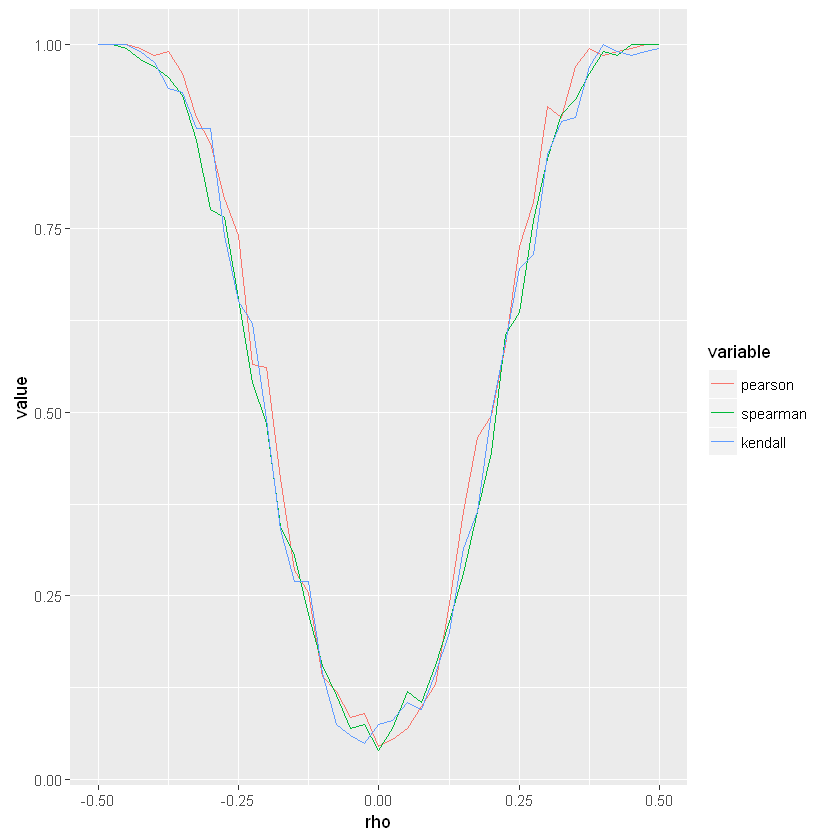

In [129]:
ggplot(md, aes(rho,value,colour=variable)) + geom_line()# + geom_legend()

可以看出功效其实都差不多，这个模拟本身误差太大以至于难以分辨。

## Theil非参数回归和几种稳健回归



In [3]:
CPIGINI <- data.frame(
    x = c(9.7, 9.5, 9.3, 9.0, 8.7, 8.6, 8.5, 7.8, 7.7, 7.5, 7.3, 7.1, 6.9, 6.3,
          6.0, 5.7, 5.6, 5.2, 5.1, 4.9, 4.8, 4.5, 4.2, 4.0, 3.9, 3.8, 3.7, 3.2,
          3.1, 3.0, 2.9, 2.7, 2.6, 2.5, 2.4, 2.2, 2.1, 2.0, 1.7, 1.6),
    y = c(25.6, 24.7, 25.0, 31.5, 36.8, 35.2, 25.8, 31.0, 45.0, 57.1, 30.0, 28.7, 35.9, 32.7,
          28.4, 70.0, 37.0, 27.3, 44.8, 24.4, 34.0, 35.8, 35.4, 31.6, 40.7, 29.0, 34.4, 51.1,
          41.3, 48.5, 44.7, 39.9, 41.0, 49.5, 36.1, 42.0, 37.4, 36.0, 38.1, 50.6)
)

### 普通线性回归回顾

一般的线性回归实际上从样本设的一个比照模型。在上面假设独立同分布的各个$\epsilon$残差项来包容所有可能$Y$取值。
该比照模型每给定一组系数$\beta$和$\sigma$，就得到一个确定模型。我们可以以$\epsilon$的正态假设对其极大似然估计从各确定模型中抽出一个最合理的。
也可以得到任何一个确定模型的确定抽样分布，在那里我们研究一些诸如系数等于0的确定模型是否是显著不合理的。

In [13]:
mod <- lm(y ~ x, data=CPIGINI)
mod


Call:
lm(formula = y ~ x, data = CPIGINI)

Coefficients:
(Intercept)            x  
     45.066       -1.489  


In [17]:
y <- CPIGINI$y
x <- CPIGINI$x

In [24]:
p <- c(0,0,1)
fn <- function(p){
    b0 <- p[1]
    b1 <- p[2]
    sigma <- p[3]
    e <- y - (b0 + b1 * x)
    return(-sum(dnorm(e, 0, sigma, log = TRUE)))
}

In [25]:
optim(p,fn)

$par
[1] 45.040264 -1.481761  8.774242

$value
[1] 143.6443

$counts
function gradient 
     214       NA 

$convergence
[1] 0

$message
NULL


In [26]:
p2 <- c(0,0)

fn2 <- function(p){
    b0 <- p[1]
    b1 <- p[2]
    e <- y - (b0 + b1 * x)
    return(sum(e^2))
}

In [27]:
optim(p2, fn2)

$par
[1] 45.060030 -1.487892

$value
[1] 3081.624

$counts
function gradient 
     101       NA 

$convergence
[1] 0

$message
NULL


我们看到上面的极大似然法和最小二乘法得到了等价的结果，其中极大似然法对$\sigma$的优化更加自然。

除了抽出这个最优模型外，我们还可以考虑一个给定模型对于所实际观测的样本来说是否是足够不合理的
（上面抽出的某种意义上是不合理程度最小的确定模型）。这种检验的一个目的是证明所有说某因素效果（系数）为0的确定模型都是不合理的。
从而证明其效果显著不为0.

给定一个样本，给定一个确定模型，再随便选一个统计量。看该确定模型在统计量下的分布，再看样本在该统计量的值是否过于极端。从而进行推断。
显然这里不拒绝原假设并不代表原假设很真，只能说明从这个统计量的角度无法拒绝。比如选统计量为不管样本什么样都返回恒定值1.

这里我们考虑一个粗糙的统计量类，给定一个确定模型后以其参数确定统计量的参数，该统计量为估计值与参数差的平方和。

In [33]:
x <- rnorm(100)
y <- 1 + 2*x + rnorm(100)
df <- data.frame(x = x, y = y)

In [35]:
lm(y ~ x , data = df)


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
     0.9731       1.8014  


In [36]:
rough.stat.class <- function(real.p){
    rough.stat <- function(p){
        sum((real.p - p)^2)
    }
    return(rough.stat)
}

In [57]:
b0 <- 1
b1 <- 2
sigma <- 1

size <- 1000

rs <- rough.stat.class(c(b0,b1))

rs.value <- c()

for(i in 1:size){
    y <- b0 + b1 * df$x + rnorm(nrow(df),sigma)
    res <- lm(y ~ x ,data.frame(x = x, y = y))
    rs.value[i] <- rs(res$)
}

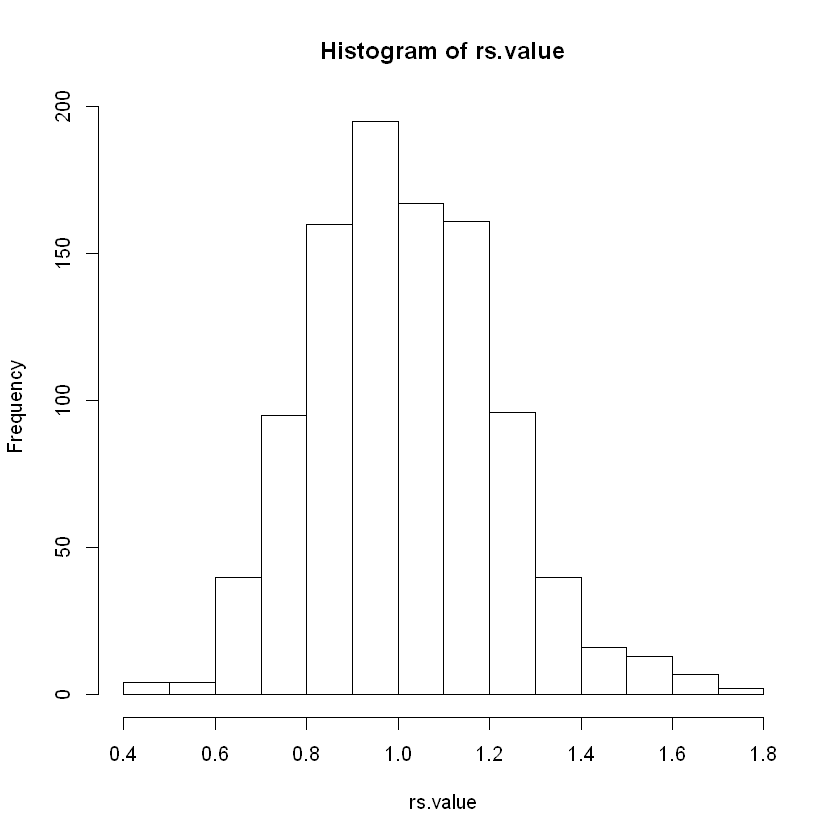

In [58]:
hist(rs.value)

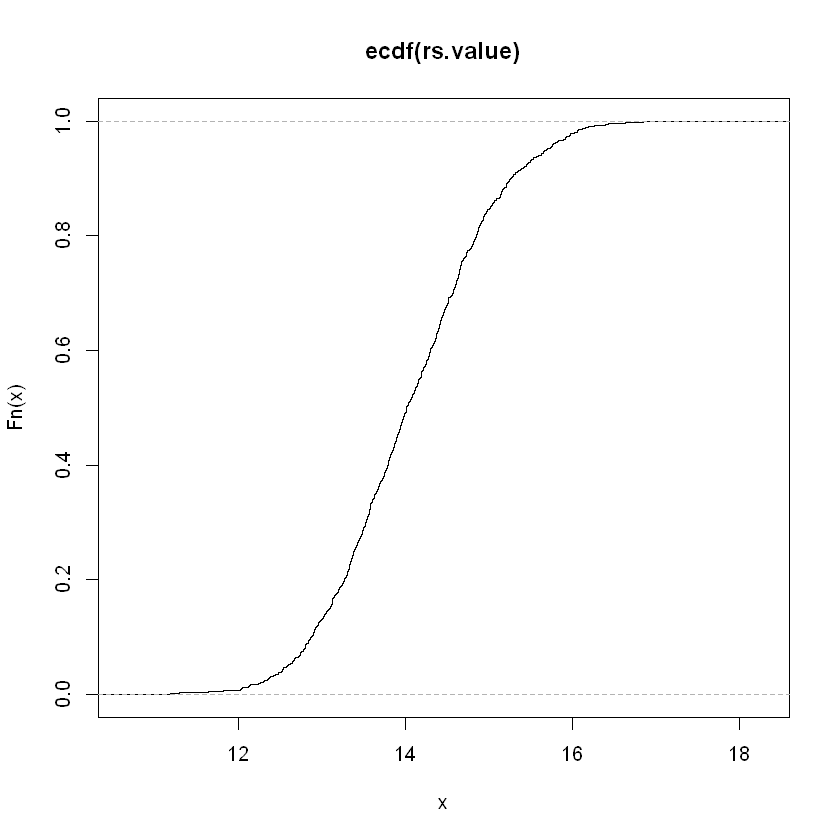

In [51]:
plot(ecdf(rs.value))

In [60]:
rs(c(0.9731,1.8014))

[1] 0.04016557

上面搞了一个该确定模型成立下一个对应检验统计量的分布，显然当样本在这个统计量上的值（最小二乘估计出参数与对应参数差的平方和）太大，
则说明这个样本不适合这个模型，或者模型对该样本解释能力很弱，很假。我们注意到的确是从这个样本里roll出来的样本果然没有在很小的位置上。
当然划定任何显著性水平，都会导致从确定模型roll出的样本有等于那个显著性水平的概率被拒绝出自该真实模型，即第一类错误。

这里我们又可以利用模拟研究功效问题，这里备择假设设成其他所有一元模型。
每一个三元组$(\beta_0,\beta_1,\sigma) \quad \sigma>0$都对应一个这样的模型。我们看看这些模型上检验拒绝的概率的情况。
注意虽然$\sigma$没有包含在检验统计量求偏差平方和的项中，但是$\sigma$会增大估计量的波动，从而在多数情况加大被拒绝的概率。

In [70]:
ecdf(rs.value)(1.376)

[1] 0.95

In [135]:
is.reject <- function(stat){
    stat > 1.375
}

experiment <- function(hyper.p, size = 200, return.stat = FALSE, return.coef = FALSE){
    b0 <- hyper.p[1]
    b1 <- hyper.p[2]
    sigma <- hyper.p[3]
    
    coef.mat <- NULL
    
    for(i in 1:size){
        y <- b0 + b1 * df$x + rnorm(nrow(df),0,sigma)
        res <- lm(y ~ x ,data.frame(x = df$x, y = y))
        coef.mat <- rbind(coef.mat, res$coefficients)
    }
    if(return.coef){
        return(coef.mat)
    }
    stat.v <- apply(coef.mat,1,rs)
    if(return.stat){
        return(stat.v)
    }
    return(mean(is.reject(stat.v)))
}

In [122]:
experiment(c(1,2,1))

[1] 0.05

In [144]:
b0.test <- c(seq(-0.8,0,0.1),seq(0.1,1.7,0.4),seq(1.8,2.5,0.1))

b0.power <- c()

for(i in 1:length(b0.test)){
    p <- c(b0.test[i],2,1)
    b0.power[i] <- experiment(p)
}
b0.power

[1] 1.000 1.000 1.000 1.000 0.995 0.905 0.600 0.290 0.035 0.000 0.000 0.000
[13] 0.000 0.000 0.000 0.005 0.055 0.230 0.545 0.910 0.995 1.000

In [145]:
b0.test

[1] -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.0  0.1  0.5  0.9  1.3  1.7  1.8
[16]  1.9  2.0  2.1  2.2  2.3  2.4  2.5

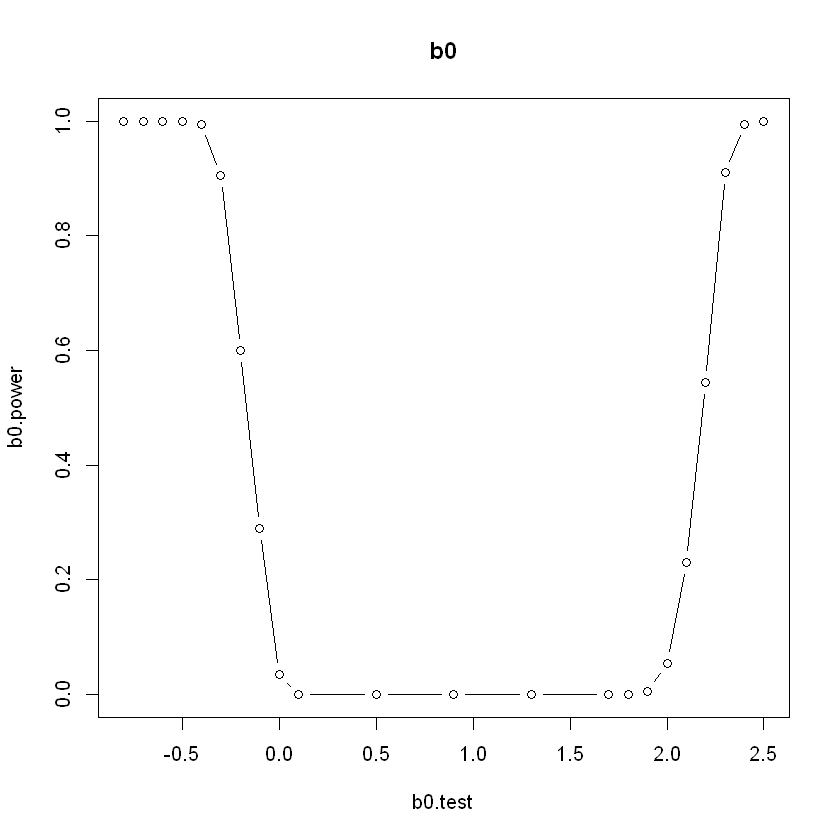

In [148]:
plot(b0.test,b0.power,'b')

In [150]:
b1.test <- c(seq(0,1.1,0.1),c(1.2,2,2.8),seq(2.9,3.5,0.1))

b1.power <- c()

for(i in 1:length(b1.test)){
    p <- c(1,b1.test[i],1)
    b1.power[i] <- experiment(p)
}
b1.power

[1] 1.000 1.000 1.000 1.000 1.000 0.995 0.975 0.910 0.660 0.260 0.030 0.000
[13] 0.000 0.000 0.000 0.005 0.075 0.240 0.660 0.885 0.990 1.000

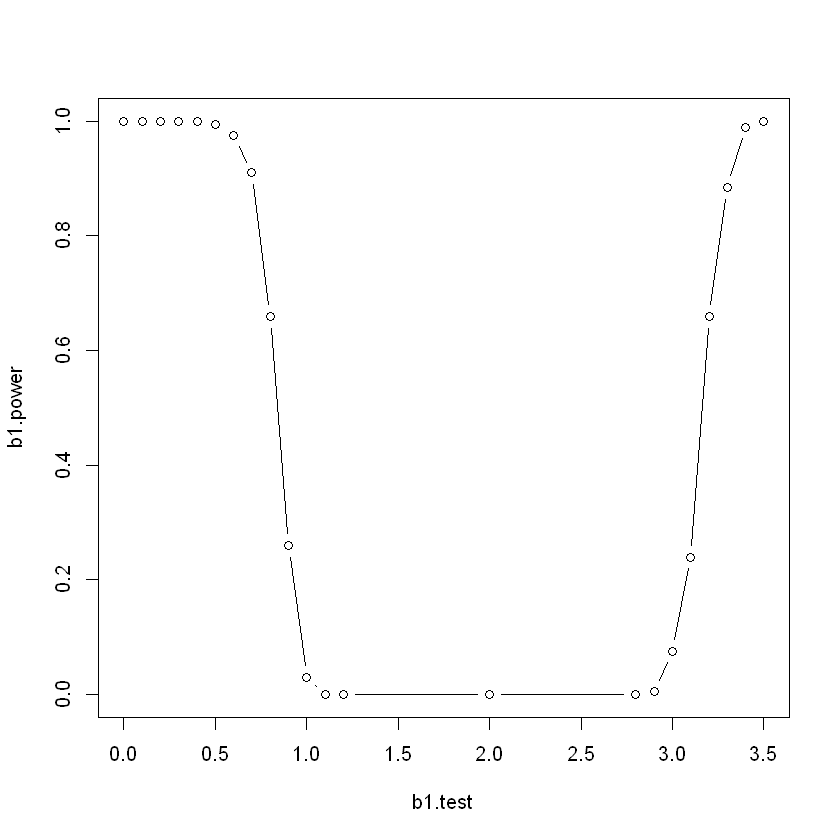

In [151]:
plot(b1.test,b1.power,'b')

In [160]:
sigma.test <- seq(0.1,30,1.5)

sigma.power <- c()

for(i in 1:length(sigma.test)){
    p <- c(1,2,sigma.test[i])
    sigma.power[i] <- experiment(p,size = 400)
}
sigma.power

[1] 0.0000 0.0000 0.0025 0.0375 0.1725 0.3150 0.4650 0.5200 0.6025 0.7175
[11] 0.7650 0.8000 0.8075 0.8300 0.8625 0.8675 0.8850 0.8900 0.9275 0.9100

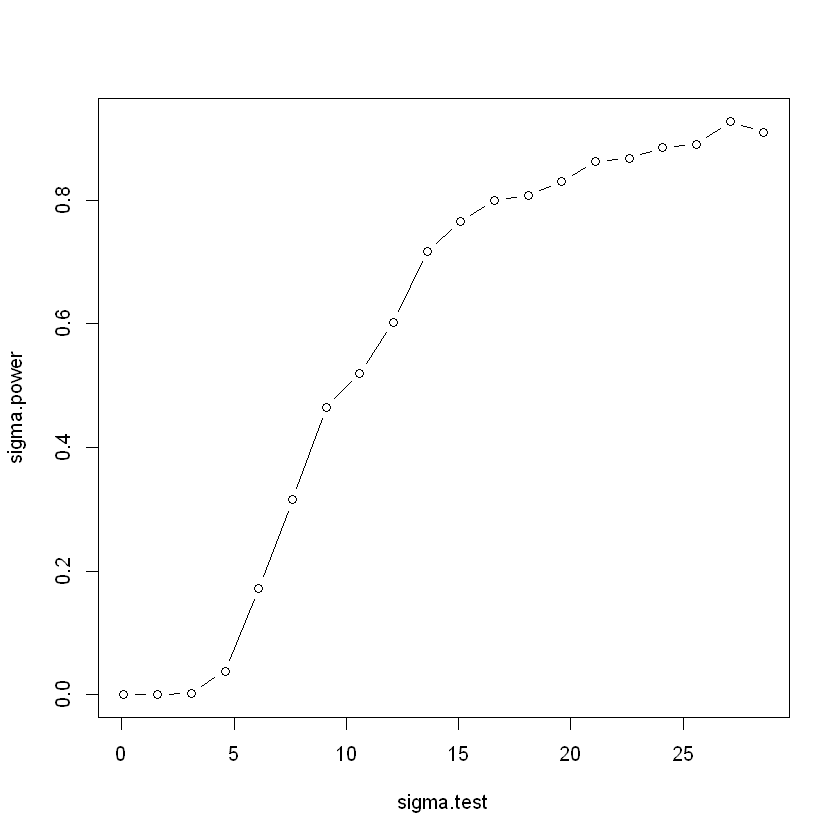

In [161]:
plot(sigma.test,sigma.power,'b')

In [166]:
sigma.test <- seq(0.1,100,10)

sigma.power <- c()

for(i in 1:length(sigma.test)){
    p <- c(1,3,sigma.test[i])
    sigma.power[i] <- experiment(p,size = 400)
}
sigma.power

[1] 0.0000 0.6875 0.8750 0.8975 0.9650 0.9750 0.9675 0.9850 0.9925 0.9925

### $X$ 作为随机变量的回归

上面的全部处理中，$Y$和设计矩阵$X$一直保持不变。虽然我们声称这些回归方程可以适用于没有在设计矩阵中出现过的情况。
但系数的估计无非是赋予这些估计值在设计矩阵刻画的似然方程上的最优性，我们的确知道对于给定样本这个系数最不能拒绝某些假设检验，那又怎么样呢？
这些假设检验全部牵扯到了设计矩阵和$Y$的值。如果加入一些新的$X,Y$对，则最优值又会变化。

归根结底，我们在处理一个泛化问题。泛化问题一般是无解的，我们可以混入一堆完全不同的真实模型，然后声称因为这次的$X,Y$对全部来自一个特定模型，
所以对于总体没有用。我们必须再引入一些有关设计矩阵的其他假设来解决这个问题。

比如说，我们假设我们的函数对于所有$X$有效，出于这一点，我们可以在所看到的局部$X,Y$对上拒绝大多数模型，
因为如果对所有$X$有效，对这些$X,Y$也应该有效。然而，我们又怎么知道这次我们所看到的$X,Y$是否是一个不那么有代表意义，暗示着真实模型的样本呢？

回避这个问题的一个方法是，我们同时建模所有变量的随机模型。然后利用条件期望把该函数提取出来。对于多元正态分布，

$$
\begin{bmatrix}
X \\ Y
\end{bmatrix}
\sim
N
\left(
\begin{bmatrix}
\mu_X \\ \mu_Y
\end{bmatrix}
,
\begin{bmatrix}
\Lambda_{XX} & \Lambda_{XY} \\
\Lambda_{YX} & \Lambda_{YY}
\end{bmatrix}
\right)
$$

有条件期望

$$
E(Y|X = x) = \mu_Y + \Lambda_{YX}\Lambda_{XX}^{-1} (x - \mu_X)
$$

我们当然可以利用极大似然法之类的来估计这些参数，然而比较其之前的模型似乎太多了一点。把最后的公式展开后，我们还是可以得到$X\beta$形式，
如果我们只是想知道$\beta$的话，就没有必要进一步分析$\beta$的构成，也就是$X$内部的分布。

### Theil 回归

Theil回归的优化目标是使得$Y$与$\epsilon$的Kendall协同系数为0。如果把此处的$X$看成随机变量的话，
$Y - -\alpha X\beta = \epsilon$与$Y$或$X$相关系数为0，
意味着$\beta$的取法抵消了$Y$和$X$中所有相关的成分，剩下的纯误差$\epsilon$已经与$X$都无关。这里的相关系数可以是Pearson之类的，
不过这里是Kendall。

$$
\epsilon_i - \epsilon_j = y_i - y_j - \beta(x_i  - x_j)
$$

Kendall协同系数有一个计算方法可以消掉另一个变量，就是将样本顺序按其中一个变量排序，于是该变量在差中的取值总是一样的，
这时候这需要看另一个变量的符号差即可。注意调换顺序是会改变$\Psi$外积矩阵（如果把$\Psi$看成两个外积矩阵按格乘的结果的话）半边的值的，
不要搞错了，比如考虑大小紧邻的两个数调换顺序，则除它们本身的两个格外其他符号值不变，
而它们两个则反号（它们本身内部就反号。）只计算一边的和的话值就变了。不过对于$\Psi$矩阵来说，由于两个外积矩阵同时这么做，
所以它的符号和不变（不管全部还是对角）。

在这里，将$x，\epsilon$按顺序排好后。我们发现令Kendall协同系数为0等价于令

$$
\sum_{j<i} \mathrm{sign}(\epsilon_i - \epsilon) = \sum_{j<i} \mathrm{sign}(  y_i - y_j - \beta(x_i  - x_j)) = 0
$$

容易看出，$\beta$取

$$
\mathrm{median}_{j < i}( \frac{y_i - y_j}{x_i - x_j} )
$$

时恰好可以使得$\beta$在一半情况中$y_i - y_j - \beta(x_i - x_j) >0 $另一半$<0$。于是可以让符号和为零。

对于$\alpha$，我们的优化目标是使得$\sum \mathrm{sign}(\epsilon) = 0$

写出$\epsilon_i = y_i -  \beta x_i - \alpha $后容易看出，$\alpha = \mathrm{median}(y_i - \beta x_i)$时恰好可以做到这一点。

这就是Theil回归的原理。主体是出于让$\beta$把Kendall相关系数清零的性质来表示$\beta$在表示（Kendall）相关性上的最优性。
然后用了一点中位数的技巧，$\alpha$的导出也很自然，基本把期望换成了中位数。

In [170]:
cor(mod$residuals,mod$model$x)

[1] -1.006e-17

In [171]:
cor(mod$residuals,mod$model$x,method='kendall')

[1] -0.04615385

In [172]:
cor(mod$residuals,mod$model$x,method='spearman')

[1] -0.08198874

从上例我们可以看出，最小二乘法，或者抵消$X$与$\epsilon$掉Pearson相关系数原则并不能抵消另外两个相关系数。自然它们导出不同的估计方法。

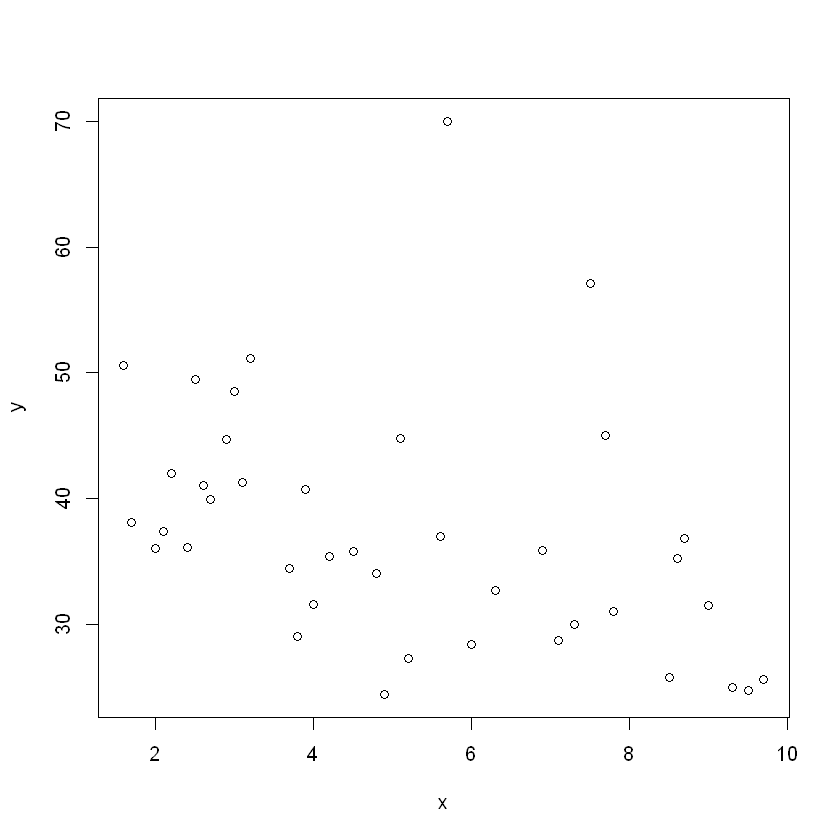

In [174]:
plot(CPIGINI)

In [176]:
x <- CPIGINI$x
y <- CPIGINI$y

In [183]:
bij <- outer(y[order(x)] ,y[order(x)],'-') / outer(x[order(x)],x[order(x)],'-')
b <- median(bij, na.rm=TRUE)
b

[1] -1.666667

In [184]:
a <- median(y - b * x)
a

[1] 43.65

In [189]:
ols.coef <- lm(y ~ x, data= CPIGINI)$coefficients
theil.coef <- c(a,b)

apply.coef <- function(coef,x){
    coef[1] + coef[2]*x
}

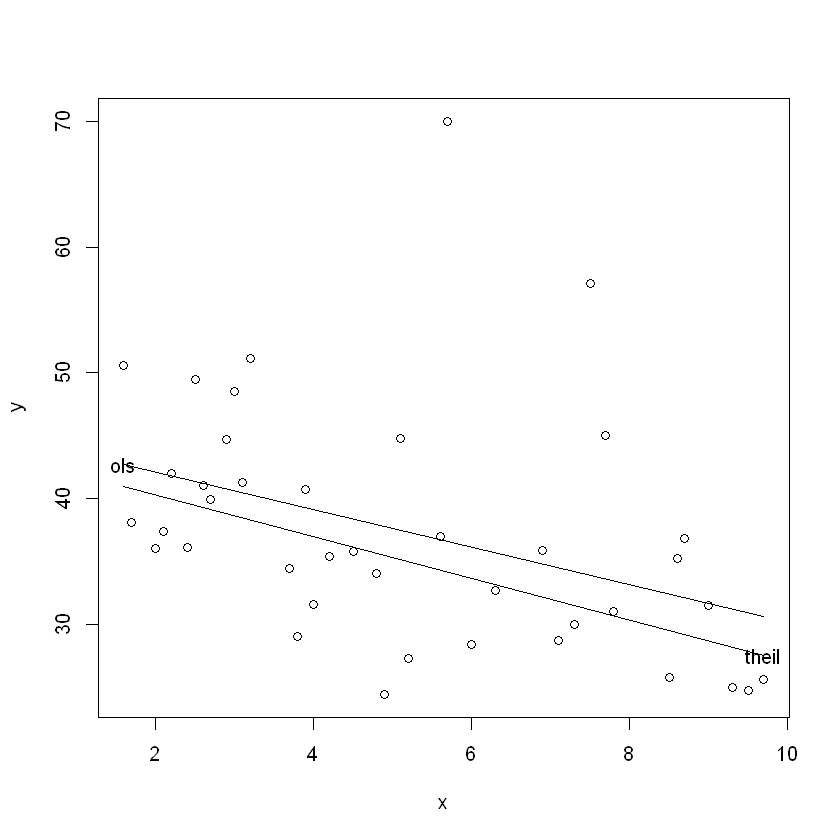

In [196]:
xx <- c(min(x),max(x))

plot(x,y)
lines(xx,apply.coef(ols.coef,xx))
lines(xx,apply.coef(theil.coef,xx))
text(xx, c(apply.coef(ols.coef,xx[1]), apply.coef(theil.coef,xx[2])), c('ols','theil'))

In [191]:
ols.coef

(Intercept)           x 
  45.065565   -1.488773

In [192]:
theil.coef

[1] 43.650000 -1.666667

In [200]:
median(outer(y,y,'-') / outer(x,x,'-'),na.rm=T)

[1] -1.666667

In [204]:
b2 <- median(apply(outer(y,y,'-') / outer(x,x,'-'),1,function(arr){median(arr,na.rm=T)}))
b2

[1] -1.743517

In [206]:
a2 <- median(y - b2 * x)
a2

[1] 44.14179

Siegel回归的$\alpha$对不上，不知道它到底怎么算的。。几个书上也没查到，又不能上网。。

### Theil回归的系数检验

回归由$X$与$\epsilon$的Kendall协同系数统计量进行，模型若真实该统计量应该应该在0左右取值，若该值太大或太小都成为拒绝的理由。
有趣的一点是展开可知，$X$与$\epsilon$的协同系数其实用不上$\alpha$。于是我们可以单独检验关于$\beta$的假设而不用加上$\alpha$取特定值的假设。

In [213]:
cor(x, y - 0*x, method='kendall')

[1] -0.3615385

In [214]:
cor.test(x, y - 0*x, method='kendall')


	Kendall's rank correlation tau

data:  x and y - 0 * x
T = 249, p-value = 0.0008507
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.3615385 


还有几个稳健回归，不过介绍不完全，就像Siegel一样估计搞不清$\alpha$怎么来的，就不谈及了。总之就是更加稳健，几乎把离群点全部无视了。
然而这也许不是我们所想要的。